In [128]:
from Common.function_version_iteration.dyna_nn.dyna_nn_v1 import LaplaceActivation, \
    DynamicNN1d, plot_fitting_result, dyna_train, torch, gpu, nn, cpu
import torch.utils.data as Data

In [129]:
# 生成非线性数据
x = torch.linspace(-3, 3, 100).reshape(-1, 1)
noise = torch.randn(*x.shape)
x_outer = torch.linspace(-6, 6, 1000).reshape(-1, 1)
y = 4.2 * (x + 1) ** 2 + 1.1 + noise + 1 * torch.randn(*x.shape) + 10 * torch.sin(x * 15)
y_outer = 4.2 * (x_outer + 1) ** 2 + 1.1 + 1 * torch.randn(*x_outer.shape) + 10 * torch.sin(x_outer * 15)
dataSet = Data.TensorDataset(x, y)
data_iter = Data.DataLoader(dataSet, batch_size=100, shuffle=True)

# 动态神经网络训练

In [130]:
# 初始化动态神经网络
dyna_nn = DynamicNN1d(1, 10, 1)
dyna_nn.set_step_optimizer(lr=0.01)
dyna_nn.set_criterion(nn.MSELoss())
dyna_nn.set_device(gpu())

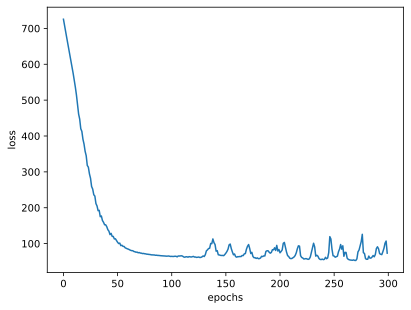

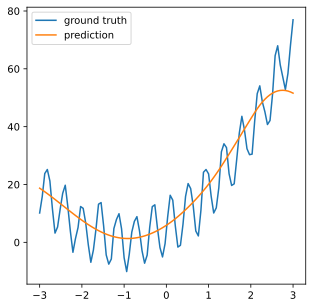

63.905308

In [131]:
# 动态神经网络初始化单元训练
dyna_nn.train_fixed(data_iter, epochs=300, plot_hist=True)
plot_fitting_result(dyna_nn, x, y)
dyna_nn.evaluate_loss(data_iter)

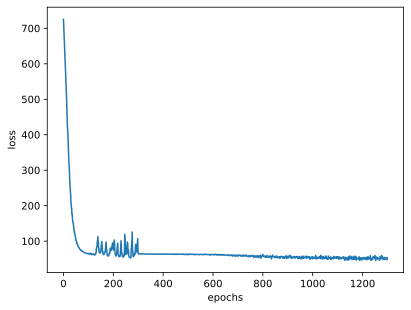

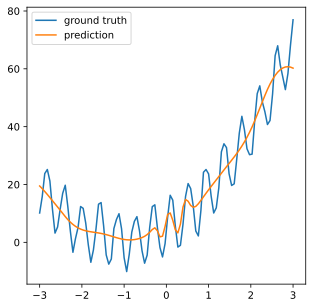

48.3621

In [132]:
# 动态神经网络第一次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 10, data_iter, 0.01, 1000, x, y)
dyna_nn.evaluate_loss(data_iter)

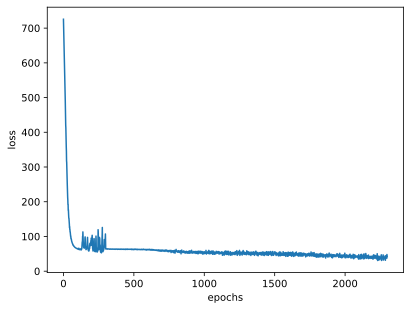

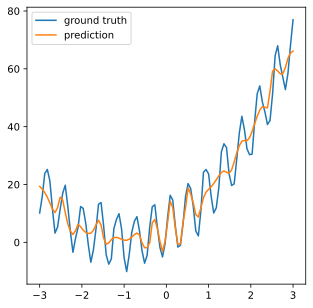

32.5609

In [133]:
# 动态神经网络第二次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 20, data_iter, 0.01, 1000, x, y)
dyna_nn.evaluate_loss(data_iter)

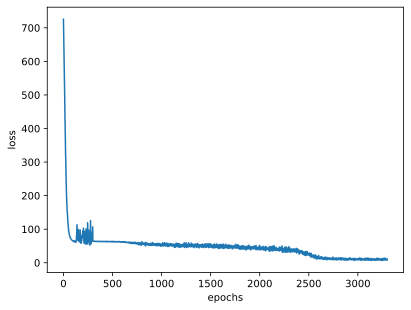

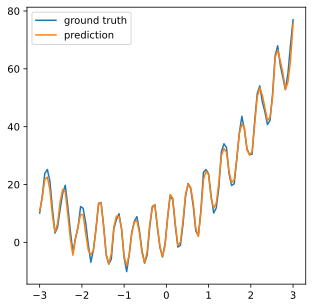

2.1805582

In [134]:
# 动态神经网络第三次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 30, data_iter, 0.01, 1000, x, y)
dyna_nn.evaluate_loss(data_iter)

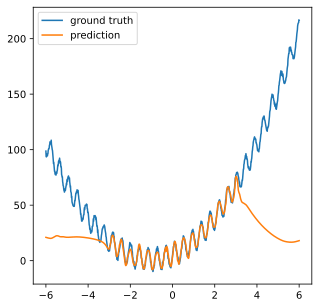

In [135]:
plot_fitting_result(dyna_nn, x_outer, y_outer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 1e-05
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)


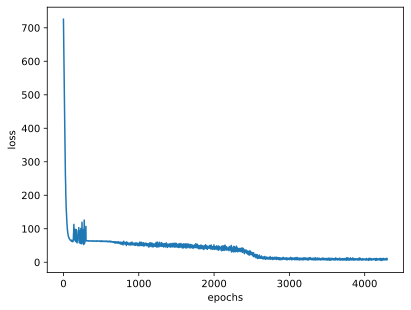

1.6073642

In [136]:
# 动态神经网络全局微调
dyna_nn.set_optimizer(lr=0.00001)
dyna_nn.train_fixed(data_iter, 1000)
dyna_nn.evaluate_loss(data_iter)

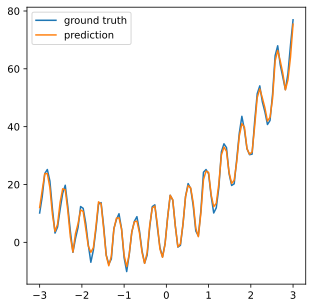

In [137]:
plot_fitting_result(dyna_nn, x, y)

# 动态网络加深训练

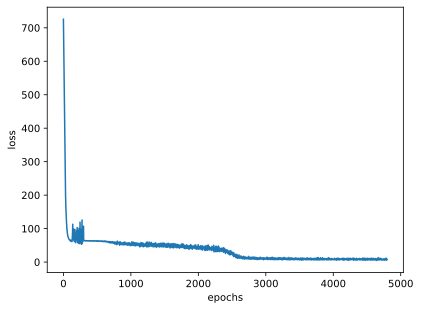

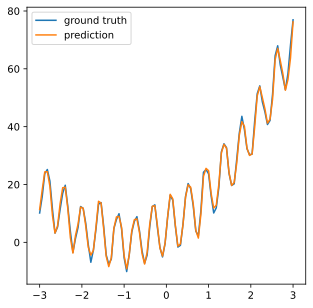

1.1594651

In [138]:
# 动态神经网络第四次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 30, data_iter, 0.01, 500, x, y)
dyna_nn.evaluate_loss(data_iter)

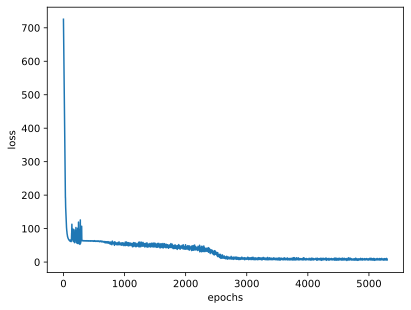

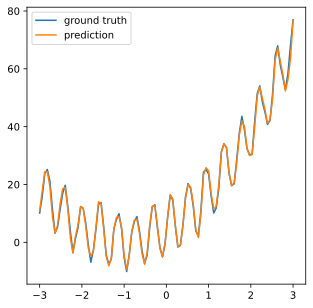

1.0603669

In [139]:
# 动态神经网络第五次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 50, data_iter, 0.01, 500, x, y)
dyna_nn.evaluate_loss(data_iter)

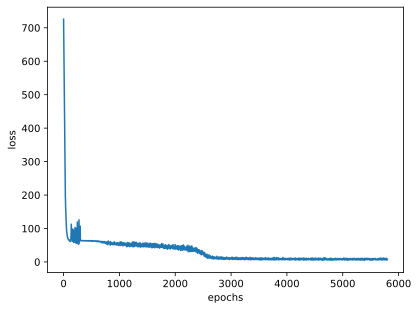

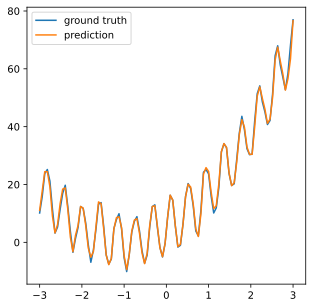

0.9832969

In [140]:
# 动态神经网络第六次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 50, data_iter, 0.01, 500, x, y)
dyna_nn.evaluate_loss(data_iter)

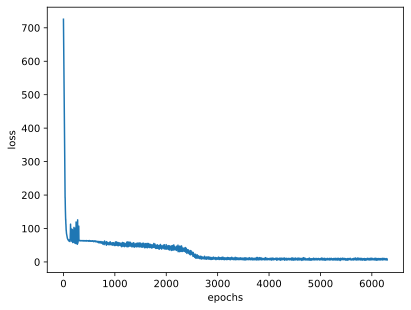

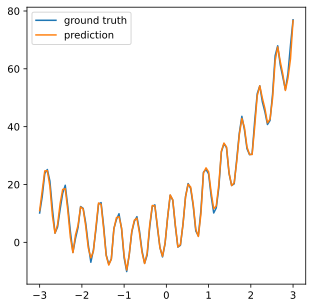

0.9741039

In [141]:
# 动态神经网络第七次训练
dyna_train(dyna_nn, LaplaceActivation, LaplaceActivation, 80, data_iter, 0.01, 500, x, y)
dyna_nn.evaluate_loss(data_iter)

# 整体网络架构层耦合对比训练

In [142]:
# 初始化动态神经网络
dyna_nn_cmp = DynamicNN1d(1, 10, 1)
dyna_nn_cmp.set_step_optimizer(lr=0.01)
dyna_nn_cmp.set_criterion(nn.MSELoss())
dyna_nn_cmp.set_device(gpu())

In [143]:
dyna_nn_cmp.add_layer(10, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(20, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(30, LaplaceActivation, LaplaceActivation)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)


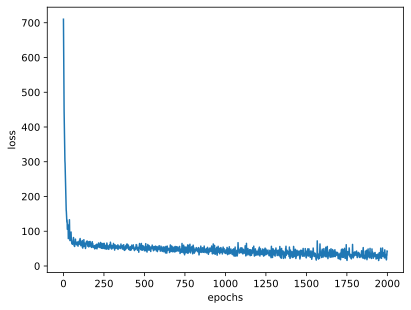

39.434906

In [144]:
dyna_nn_cmp.set_optimizer(lr=0.01)
dyna_nn_cmp.train_fixed(data_iter, 2000)
dyna_nn_cmp.evaluate_loss(data_iter)

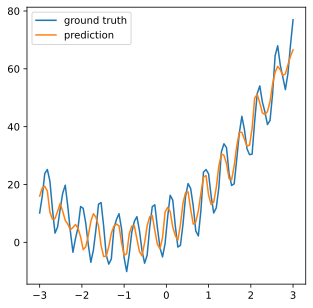

In [145]:
plot_fitting_result(dyna_nn_cmp, x, y)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)


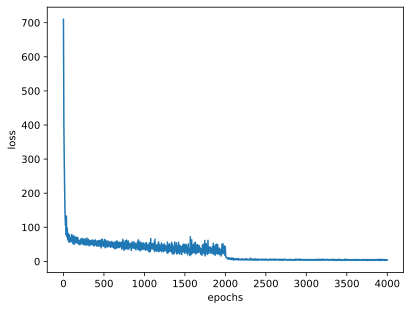

1.520381

In [146]:
dyna_nn_cmp.set_optimizer(lr=0.001)
dyna_nn_cmp.train_fixed(data_iter, 2000)
dyna_nn_cmp.evaluate_loss(data_iter)

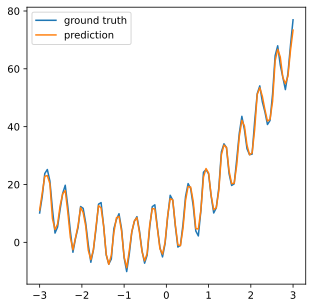

In [147]:
plot_fitting_result(dyna_nn_cmp, x, y)

# 八层深度网络架构层耦合对比训练

In [148]:
# 初始化动态神经网络
dyna_nn_cmp = DynamicNN1d(1, 10, 1)
dyna_nn_cmp.set_step_optimizer(lr=0.01)
dyna_nn_cmp.set_criterion(nn.MSELoss())
dyna_nn_cmp.set_device(gpu())

In [149]:
dyna_nn_cmp.add_layer(10, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(20, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(30, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(30, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(50, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(50, LaplaceActivation, LaplaceActivation)
dyna_nn_cmp.add_layer(80, LaplaceActivation, LaplaceActivation)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)


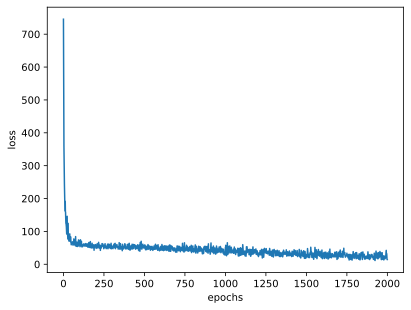

16.663717

In [150]:
dyna_nn_cmp.set_optimizer(lr=0.01)
dyna_nn_cmp.train_fixed(data_iter, 2000)
dyna_nn_cmp.evaluate_loss(data_iter)

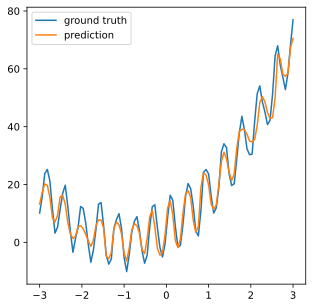

In [151]:
plot_fitting_result(dyna_nn_cmp, x, y)

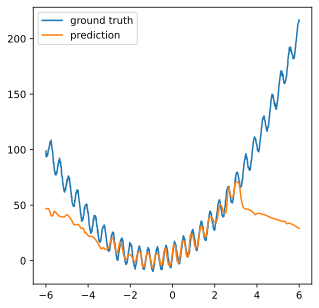

In [152]:
plot_fitting_result(dyna_nn_cmp, x_outer, y_outer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)


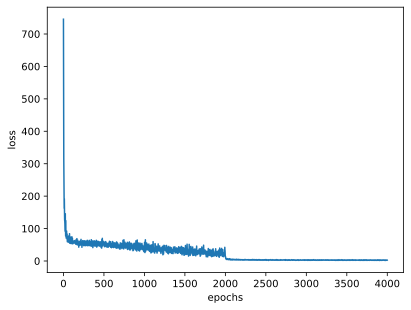

1.929338

In [153]:
dyna_nn_cmp.set_optimizer(lr=0.001)
dyna_nn_cmp.train_fixed(data_iter, 2000)
dyna_nn_cmp.evaluate_loss(data_iter)

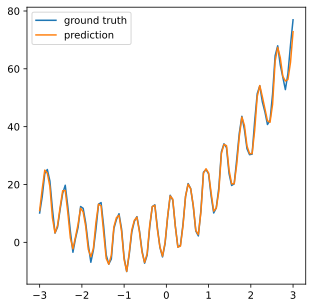

In [154]:
plot_fitting_result(dyna_nn_cmp, x, y)

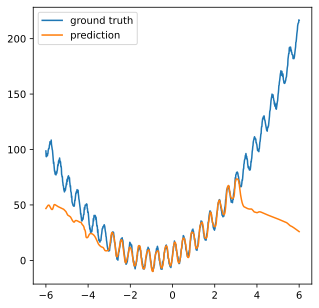

In [155]:
plot_fitting_result(dyna_nn_cmp, x_outer, y_outer)